In [62]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import matplotlib.image as image
from PIL import Image, ImageOps
from numpy import asarray
import threading

In [63]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#Color conversion BGR 2 RGB
    image.flags.writeable = False #Image is unwriteable
    results = model.process(image)#Make prediction
    image.flags.writeable = True#Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#color conversion RGB 2 BGR
    return image, results

In [64]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness = 1, circle_radius =1),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness = 1, circle_radius =1)
                             )
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness = 2, circle_radius =2)
                             )

In [65]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

'MP_Data\\C_image'

In [66]:
count = 0
folderName = 'B_image'
DATA_PATH = os.path.join('MP_Data', folderName)
DATA_PATH

'MP_Data\\B_image'

In [74]:
folder_num = 0
dem = 0

In [78]:
print(folder_num, dem, count)

11 306 3


In [79]:
vidcap = cv2.VideoCapture('video_data\B_R.mp4')
ret, frame = vidcap.read()

In [80]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while vidcap.isOpened():  
        ret, frame = vidcap.read()
        if ret:
            npy_path = os.path.join('MP_Data', 'B', str(folder_num), str(count))
#             frame = cv2.rotate(frame, cv2.ROTATE_180) # Xoay ảnh 180 độ
            image, result = mediapipe_detection(frame, holistic)
            #Vẽ landmark lên ảnh
            draw_styled_landmarks(image, result)
            #Tổng hợp các keypoint thành 1 ma trận vecto cột (1662,)
            keypoints = extract_keypoints(result)
            #lưu keypoint vào folder data
#             npy_path = os.path.join('MP_Data', 'B', str(count))
            np.save(npy_path, keypoints)
            #Lưu ảnh vào folder ảnh
            cv2.imwrite(os.path.join(DATA_PATH, "%d.jpg" % dem), image)     # save frame as JPEG file    
            print('Read a new frame to: ', DATA_PATH, vidcap.isOpened())
            count += 1
            dem += 1
            if count == 30:
                folder_num += 1
                count = 0
        else:
            break

Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new 

Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new frame to:  MP_Data\B_image True
Read a new 

# Create folder to store data

In [43]:
for i in range(30):
    try:
        os.makedirs(os.path.join('MP_Data', 'B', str(i)))
    except Exception as exception:
        print(exception)
        pass

In [54]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    image, result = mediapipe_detection(frame, holistic)
    draw_styled_landmarks(image, result)

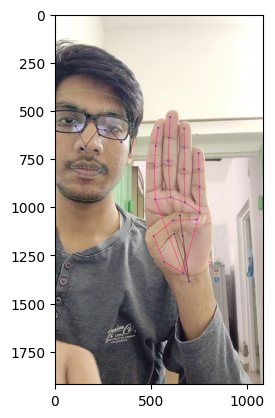

In [55]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Collect data manually

In [93]:
numb_of_frame = 455

In [94]:
folder_num, dem, count = 14, 445, 25
print(folder_num, dem, count)

14 445 25


In [95]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    count_frame = 0
            # Loop through video length aka sequence length
    for frame_num in range(numb_of_frame):
        npy_path = os.path.join('MP_Data', 'B', str(folder_num), str(count))
                # Read feed
        ret, frame = cap.read()
                
                # Make detections
        image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
        draw_styled_landmarks(image, results)
        
                # NEW Apply wait logic
        if frame_num == 0: 
            cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
            cv2.putText(image, 'Collecting {} frames '.format(frame_num), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
            cv2.imshow('OpenCV Feed', image)
            cv2.waitKey(2000)
        else: 
            cv2.putText(image, 'Collecting frames {}'.format(frame_num), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
            cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
        keypoints = extract_keypoints(results)
        img_path = os.path.join('MP_Data', 'B_image', '%d.jpg' % dem)
        print("Save data to ", npy_path)
        np.save(npy_path, keypoints)
        cv2.imwrite(img_path, image)
        count+=1
        dem += 1
        if count == 30:
            folder_num += 1
            count = 0    
#             cv2.imwrite(os.path.join("MP_Data", "%d.jpg" % count), cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#             keypoints = extract_keypoints(results)
#             npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#             np.save(npy_path, keypoints)
                
                # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

Save data to  MP_Data\B\14\25
Save data to  MP_Data\B\14\26
Save data to  MP_Data\B\14\27
Save data to  MP_Data\B\14\28
Save data to  MP_Data\B\14\29
Save data to  MP_Data\B\15\0
Save data to  MP_Data\B\15\1
Save data to  MP_Data\B\15\2
Save data to  MP_Data\B\15\3
Save data to  MP_Data\B\15\4
Save data to  MP_Data\B\15\5
Save data to  MP_Data\B\15\6
Save data to  MP_Data\B\15\7
Save data to  MP_Data\B\15\8
Save data to  MP_Data\B\15\9
Save data to  MP_Data\B\15\10
Save data to  MP_Data\B\15\11
Save data to  MP_Data\B\15\12
Save data to  MP_Data\B\15\13
Save data to  MP_Data\B\15\14
Save data to  MP_Data\B\15\15
Save data to  MP_Data\B\15\16
Save data to  MP_Data\B\15\17
Save data to  MP_Data\B\15\18
Save data to  MP_Data\B\15\19
Save data to  MP_Data\B\15\20
Save data to  MP_Data\B\15\21
Save data to  MP_Data\B\15\22
Save data to  MP_Data\B\15\23
Save data to  MP_Data\B\15\24
Save data to  MP_Data\B\15\25
Save data to  MP_Data\B\15\26
Save data to  MP_Data\B\15\27
Save data to  MP_Dat

Save data to  MP_Data\B\24\3
Save data to  MP_Data\B\24\4
Save data to  MP_Data\B\24\5
Save data to  MP_Data\B\24\6
Save data to  MP_Data\B\24\7
Save data to  MP_Data\B\24\8
Save data to  MP_Data\B\24\9
Save data to  MP_Data\B\24\10
Save data to  MP_Data\B\24\11
Save data to  MP_Data\B\24\12
Save data to  MP_Data\B\24\13
Save data to  MP_Data\B\24\14
Save data to  MP_Data\B\24\15
Save data to  MP_Data\B\24\16
Save data to  MP_Data\B\24\17
Save data to  MP_Data\B\24\18
Save data to  MP_Data\B\24\19
Save data to  MP_Data\B\24\20
Save data to  MP_Data\B\24\21
Save data to  MP_Data\B\24\22
Save data to  MP_Data\B\24\23
Save data to  MP_Data\B\24\24
Save data to  MP_Data\B\24\25
Save data to  MP_Data\B\24\26
Save data to  MP_Data\B\24\27
Save data to  MP_Data\B\24\28
Save data to  MP_Data\B\24\29
Save data to  MP_Data\B\25\0
Save data to  MP_Data\B\25\1
Save data to  MP_Data\B\25\2
Save data to  MP_Data\B\25\3
Save data to  MP_Data\B\25\4
Save data to  MP_Data\B\25\5
Save data to  MP_Data\B

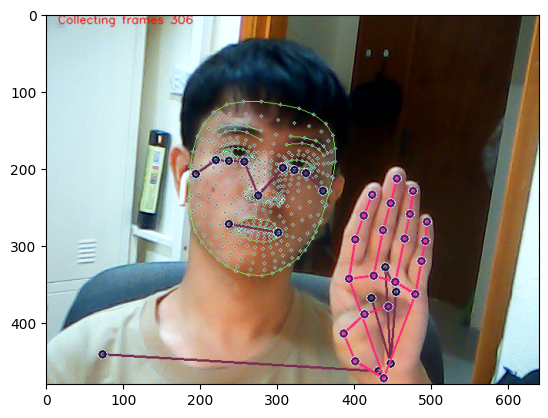

In [26]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Extract Keypoint

In [33]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if \
        results.face_landmarks else np.zeros(468*3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if \
        results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if \
        results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if \
        results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [115]:
result

[x: 0.06003723293542862
y: 0.3707529902458191
z: -1.4679982662200928
visibility: 0.9992892742156982
, x: 0.10750464349985123
y: 0.3112953305244446
z: -1.3569257259368896
visibility: 0.9992857575416565
, x: 0.14433689415454865
y: 0.31206804513931274
z: -1.3572591543197632
visibility: 0.9994068741798401
, x: 0.18225836753845215
y: 0.31374749541282654
z: -1.3568994998931885
visibility: 0.9994503855705261
, x: -0.0029137018136680126
y: 0.31434497237205505
z: -1.3720329999923706
visibility: 0.9987128973007202
, x: -0.05313939228653908
y: 0.3175376355648041
z: -1.3706436157226562
visibility: 0.9982330799102783
, x: -0.10293535143136978
y: 0.32133179903030396
z: -1.371224284172058
visibility: 0.9976533055305481
, x: 0.22765317559242249
y: 0.3447926342487335
z: -0.6232057213783264
visibility: 0.9996053576469421
, x: -0.16855180263519287
y: 0.35335543751716614
z: -0.6711868047714233
visibility: 0.9985465407371521
, x: 0.12313035875558853
y: 0.4281865060329437
z: -1.196231722831726
visibility: 0

In [133]:
keypoints = extract_keypoints(result)
keypoints

array([ 0.14794818,  0.35762423, -1.50142109, ...,  0.        ,
        0.        ,  0.        ])